***Méthodes numériques:Module 1.***
*********************************
Modélisation du vol d'une fusée.
==
### But #


Calculer, selon la méthode d'Euler, l'altitude et la vitesse d'une fusée qui possède une certaine masse de carburant initiale et qui la consume à un taux constant, de son lancer jusqu'à l'impact avec le sol.

Nous considérons ce mouvement seulement dans la direction verticale de l'espace. La vitesse est donc la vitesse verticale de la fusée.

In [2]:
import numpy
from matplotlib import pyplot
%matplotlib inline

### Principe #


Les équations différentielles de ce problème sont:  
* $$\frac{dh}{dt}=v$$ 
* $$\frac{dv}{dt}=-g+\frac{\dot{m_{p}}}{m_{s}+m{p}}ve - \frac{1}{2}\frac{\rho v \mid{v}\mid AC_{D}}{mp+ms}$$

où
* mp est la masse de carburant donnée par $$m_p = m_{po} - \int^t_0 \dot{m}_p d\tau$$
* $\dot{mp}$ est le taux de consommation du carburant, qui vaut 20 kg/s entre t=0.0 et t=5.0 et qui vaut 0 kg/s ensuite.  
* $\rho$ est la masse volumique de l'air (supposée constante)
* g est la constante gravitationnelle g=9.81 m/s²
* ms est la masse de la fusée
* A est la section maximale de la fusée (donnée par $\pi*r²$)
* CD est le coefficient de traînée
* ve est la vitesse limite 
* v est la vitesse de la fusée
* h est la hauteur de la fusée

D'après la méthode d'Euler, on peut résoudre numériquement ces équations à partir des valeurs initiales d'altitude et de vitesse en avançant par pas de t=dt.
* $$h_{n+1}=h_{n}+v_{n}dt$$ 
* $$v_{n+1}=v_{n}+dt*(-g+\frac{\dot{m_{p}}}{m_{s}+m{p}}ve - \frac{1}{2}\frac{\rho v \mid{v}\mid AC_{D}}{ms+mp})$$
Nous allons calculer les valeurs de h(altitude de la fusée) et v(vitesse) entre t=0 et t=T(temps final où la fusée se crashe) toutes les dt=0.1s et les reporter dans un tableau et dans deux graphiques: altitude en fonction du temps et vitesse en fonction du temps. Nous pourrons ensuite répondre aux questions posées dans le problème.

### Paramètres du problème #

In [3]:
g=9.81
p=1.091
r=0.5
A=numpy.pi*r**2
ve=325.0
ms=50.0
mpo=100.0
CD=0.15
dt=0.1
N=1000
v=numpy.zeros(N)
h=numpy.zeros(N)
t=numpy.zeros(N)
v[0]=0.0
h[0]=0.0
t[0]=0.0

En plus des données initiales et paramètres donnés, nous créons trois listes qui serviront à stocker les données récoltées pour le temps t, l'altitude h et la vitesse v.

Nous ne connaissons pas à l'avance la taille N que doivent avoir nos listes pour couvrir l'entièreté du problème, c'est-à-dire jusqu'à ce que la fusée retombe au sol. Néanmoins nous pouvons faire une estimation sur base du problème physique. Chaque étape dure 0.1s et la fusée possède du carburant jusqu'à la 5ème seconde. L'ordre de grandeur du temps mis pour effectuer la trajectoire sera donc compris entre environ 10 secondes et 100 secondes. Comme le nombre d'étapes reste raisonnable et que le calcul n'est pas trop complexe, on peut prendre une borne supérieure de t=100s, ce qui correspond à N=1000.


### Définition des fonctions #

Pour alléger le code et pour permettre la réutilisation de celui-ci pour des équations légèrement différentes, nous allons créer trois fonctions:
* mp_value(i)  calcule la valeur de mp, la masse de carburant à l'instant t=i*dt 
* mp_dot(t)  nous permet de disposer de la valeur de $\dot{mp}$en l'instant t=i*dt
* derivativev(i,v0) donne la dérivée de la vitesse v au temps t=i*dt et à une vitesse v0.

Pour être tout à fait systématique, nous devrions faire de même pour la dérivée de h, mais cela ne nous semble pas judicieux du point de vue de la clarté étant donnée que cette dérivée est constante.

Nous créons la fonction mp_value grâce à un rapide calcul d'après la formule générale pour mp et le graphe donnant $\dot{m}_p$ en fonction du temps.
On trouve qu'à 5s, $mp = 100 kg - 20 kg/s * 5s = 0 kg$. 
Le carburant est épuisé à $t=5s$ et $mp$ vaudra 0 kg à partir de cet instant. 
 On peut donc créer une fonction qui utilise, à la condition que t soit inférieur ou égal à 5s, la formule générale $m_p = m_{po} - \int^t_0 \dot{m}_p d\tau = m_{po} - \dot{m}_p t$ (où t est l'instant auquel on cherche la la masse de carburant) et qui donne zéro si t est supérieur à 5s.

In [4]:
def mp_value(i):
    if i<50:
        mp=mpo-20.0*t[i]
    else:
        mp=0
    return mp  

On sait que $\dot{m}_p$ vaut 20kg/s jusqu'à t=5s et 0kg/s après. On peut alors écrire :

In [22]:
def mp_dot(i):
    if i<50:
        mpdot=20.0
    else:
        mpdot=0.0
    return mpdot

In [23]:
def derivativev(i,v0):
    derivativev=(-g+ ((mp_dot(i)/(ms+mp_value(i)))*ve)- ((0.5)*p*v0*abs(v0)*A*CD)/(mp_value(i)+ms))
    return derivativev 

### Calcul des valeurs de h et de v#

Nous implémentons le calcul des valeurs successives de h et v par une boucle "while" qui construit progressivement une liste de vitesses et d'altitudes en fonction du temps (donc, en fonction de la position dans la liste "t") en utilisant la méthode d'Euler, comme indiqué dans la partie intitulée "Principe".

Nous demandons ensuite d'imprimer ces valeurs dans une liste à trois entrées reprenant l'instant t, la vitesse v et enfin l'altitude h. Comme les nombres réels sont stockés sur 64 bits, la précision est de $10^{-15}$. La valeur de t est donc précise à cette erreur près. Pour clarifier la liste des résultats nous limitons le nombre de décimales à imprimer à une pour le temps et à deux pour la vitesse et l'altitude (car le nombre de chiffres significatifs est de 3 dans les données du problème).

In [24]:
print([t[0],v[0],h[0]])
n=1
while h[n-1]>=0.0:
    h[n]=h[n-1]+v[n-1]*dt
    v[n]=v[n-1]+dt*derivativev(n-1,v[n-1])
    t[n]=t[n-1]+dt
 
    print([("%.1f" % t[n]),("%.2f" % v[n]),("%.2f" % h[n])])
    
    n=n+1


[0.0, 0.0, 0.0]
['0.1', '3.35', '0.00']
['0.2', '6.76', '0.34']
['0.3', '10.23', '1.01']
['0.4', '13.76', '2.03']
['0.5', '17.35', '3.41']
['0.6', '21.00', '5.15']
['0.7', '24.70', '7.25']
['0.8', '28.47', '9.72']
['0.9', '32.30', '12.56']
['1.0', '36.20', '15.79']
['1.1', '40.15', '19.41']
['1.2', '44.17', '23.43']
['1.3', '48.25', '27.85']
['1.4', '52.39', '32.67']
['1.5', '56.59', '37.91']
['1.6', '60.85', '43.57']
['1.7', '65.18', '49.65']
['1.8', '69.57', '56.17']
['1.9', '74.01', '63.13']
['2.0', '78.52', '70.53']
['2.1', '83.09', '78.38']
['2.2', '87.72', '86.69']
['2.3', '92.40', '95.46']
['2.4', '97.14', '104.70']
['2.5', '101.94', '114.42']
['2.6', '106.79', '124.61']
['2.7', '111.69', '135.29']
['2.8', '116.65', '146.46']
['2.9', '121.65', '158.12']
['3.0', '126.70', '170.29']
['3.1', '131.80', '182.96']
['3.2', '136.93', '196.14']
['3.3', '142.11', '209.83']
['3.4', '147.32', '224.04']
['3.5', '152.57', '238.78']
['3.6', '157.84', '254.03']
['3.7', '163.14', '269.82']
['3.8

### Graphiques #

Voici deux graphiques permettant de visualiser la solution du problème. 

Le premier reprend l'altitude de la fusée en fonction du temps, entre le décollage et le crash au sol. 

Le second reprend la vitesse de la fusée en fonction du temps du décollage au crash. (Nous avons rajouté en bleu la ligne des abscisses pour une meilleure lisibilité du graphique)

Nous pouvons constater que notre solution est cohérente avec le système physique que l'on veut décrire: l'altitude augmente rapidement jusqu'à épuisement de l'énergie cinétique de la fusée (qui survient peu de temps après son épuisement de carburant) et retombe "plus lentement" vers le sol. La vitesse augmente très rapidement jusqu'à épuisement du carburant et diminue ensuite rapidement. L'instant où la vitesse est nulle correspond à l'altitude la plus haute atteinte par la fusée.

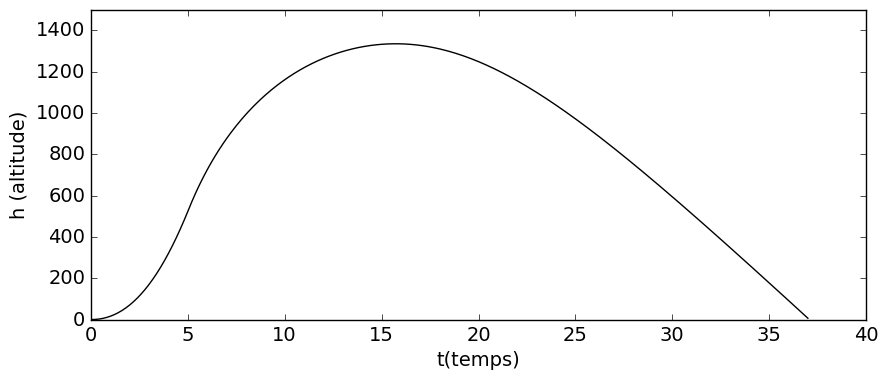

In [9]:
pyplot.figure(figsize=(10,4))   #set plot size
pyplot.ylim(0,1500)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t(temps)', fontsize=14) #x label
pyplot.ylabel('h (altitude)', fontsize=14) #y label
pyplot.plot(t[0:n-1],h[0:n-1], 'k-')

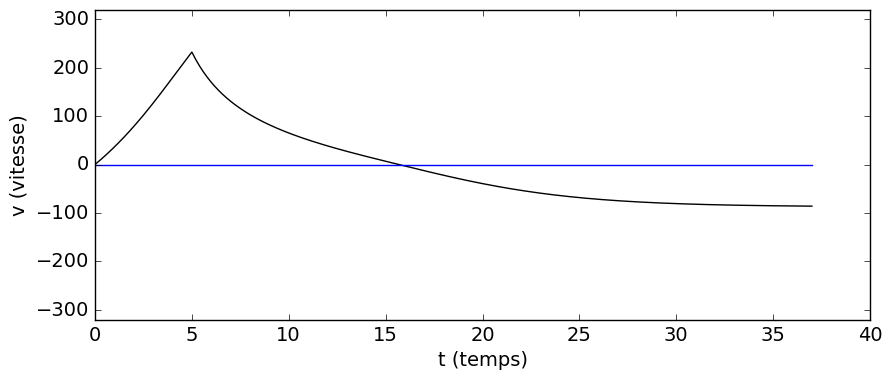

In [10]:
pyplot.figure(figsize=(10,4))   #set plot size
pyplot.ylim(-320,320)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t (temps)', fontsize=14) #x label
pyplot.ylabel('v (vitesse)', fontsize=14) #y label
pyplot.plot(t[0:n-1],v[0:n-1], 'k-')
pyplot.plot(t[0:n-1],numpy.zeros(n-1))

### Questions #


$\underline{Q1.}$ 

- Quelle masse de carburant la fusée contient-elle à t = 3,2s ?

La position dans la liste t correspondant à t = 3,2s sera atteinte à la 32ème étape, étant donné que le pas est de 0.1s. On peut donc trouver la masse de carburant à l'aide de la fonction que nous avons utilisée précédemment :

In [11]:
print (mp_value(32), 'kg')

36.0 kg


 $\underline{Q2.}$ 
 - Quelle est, arrondie à deux décimales, la vitesse maximale atteinte ? 

La vitesse sera maximale quand la masse de carburant passera à 0kg. Dès que la fusée ne possède plus de carburant, sa vitesse ne peut que décroître, aucune force n'agissant plus dès lors pour l'accélérer (c'est-à-dire, pour lui donner une accélération positive). Cette boucle permet de calculer cette vitesse:

In [13]:
j=0
while mp_value(j)>0. :
    j=j+1

print (round(v[j-1],2), 'm/s')

232.11 m/s


- A quel instant cette vitesse est-elle atteinte ?

On prend l'élément correspondant dans la liste t.

In [14]:
print (round(t[j-1],2), 's')

5.0 s


- A quelle altitude est la fusée à cet instant ?

On prend l'élément correspondant dans la liste h.

In [15]:
print (round(h[j-1],2), 'm')

523.52 m



$\underline{Q3.}$ 
 - Quelle est, arrondie à deux décimales, l'altitude maximale atteinte ? 

Par conservation de l'énergie mécanique, l'altitude maximale est atteinte lorsque la vitesse devient nulle. Etant donné la discrétisation de nos valeurs, nous devons regarder l'étape à laquelle la vitesse change de signe: elle prend pour la première fois une valeur négative. Il est important de demander que la vitesse soit négative, et pas nulle car la vitesse initiale est nulle et cela poserait problème.
On peut donc écrire :

In [18]:
k=0
while v[k]>=0. :
    k=k+1

print (round(h[k-1],2), 'm')

1334.11 m


- A quel instant cette altitude est-elle atteinte ?

On prend l'élément correspondant dans la liste t.

In [19]:
print (round(t[k-1],2), 's')

15.6 s



$\underline{Q4.}$ 
 - A quel instant l'impact avec le sol a-t-il lieu ? 

La boucle qui a permis de construire nos listes de temps, vitesses et altitudes s'est arrêtée à la première occurrence d'un h négatif (au premier instant après l'impact). On doit donc prendre le temps en position [n-1] dans la list t.

In [20]:
print (round(t[n-1],2), 's')

37.1 s


- Quelle est la vitesse de l'engin au moment de l'impact ?

De même pour v :

In [21]:
print (round(v[n-1],2), 'm/s')

-86.01 m/s
